In [48]:
# Объявление импортов 
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import os

### Импортирую db1 

In [26]:
path = os.getcwd()
fish_df = pd.read_csv(path + r"\test_data\db1\ref\fish.csv", error_bad_lines=False, sep=';')
prod_designate_df = pd.read_csv(path + r"\test_data\db1\ref\prod_designate.csv", error_bad_lines=False, sep=';')
prod_type_df = pd.read_csv(path + r"\test_data\db1\ref\prod_type.csv", error_bad_lines=False, sep=';')
regime_df = pd.read_csv(path + r"\test_data\db1\ref\regime.csv", error_bad_lines=False, sep=';')
region_df = pd.read_csv(path + r"\test_data\db1\ref\region.csv", error_bad_lines=False, sep=';')

In [27]:
catch_df = pd.read_csv(path + r'\test_data\db1\catch.csv', error_bad_lines=False, sep=',')
product_df = pd.read_csv(path + r'\test_data\db1\product.csv', error_bad_lines=False, sep=',')

## Обзор данных

### Support data

In [28]:
fish_df['id_fish'].value_counts()

0        1
879      1
863      1
864      1
865      1
        ..
410      1
411      1
412      1
414      1
10208    1
Name: id_fish, Length: 822, dtype: int64

In [29]:
product_df

,id.ves,date,id.prod.designate,id.prod.type,prod.volume,prod.board.volume
0,1610,2022-01-01,1,10128,0.102,8.234
1,757,2022-01-01,3,3901,0.000,42.780
2,564,2022-01-01,1,1113,0.000,0.050
3,564,2022-01-01,1,1135,0.000,4.300
4,564,2022-01-01,1,4648,0.000,0.225
...,...,...,...,...,...,...
523745,417,2022-05-26,1,9991,13.470,0.000
523746,62,2022-05-26,1,9660,1.485,17.259
523747,865,2022-05-26,1,9660,21.120,181.390
523748,865,2022-05-26,1,9661,0.000,9.020


## Main data

### Подмена ID на текстовое название рыбы + приведение к нормальному виду

In [30]:
fish_db_anomalies_unique = []
global fish_db_anomalies_unique

def spoofing(id):
    try:
        return fish_df[fish_df['id_fish'] == id]['fish'].values[0]
    except:
        fish_db_anomalies_unique.append(id)
        
catch_df['fish'] = catch_df['id.fish'].apply(spoofing)
catch_df['catch.volume'] = catch_df['catch.volume']*1000

Аномалия неправильной нумерации\соответствия данным fish_db (возможно ошиблись просто)

In [31]:
set(fish_db_anomalies_unique)

{196, 232}

### Импортирую db2


In [32]:
ext1 = pd.read_csv(path + r"\test_data\db2\Ext.csv", error_bad_lines=False, sep=',')
ext2 = pd.read_csv(path + r"\test_data\db2\Ext2.csv", error_bad_lines=False, sep=',')
ext2['date_vsd'] = ext2['date_vsd'].apply(lambda x: x[:10])

### Используем сортирвку только за месяц апрель по всем БД,

In [39]:
ext1_dated = ext1[ext1['date_fishery'] > '2022-04-24 00:00:00']
ext2_dated = ext2[ext2['date_vsd'] > '2022-04-24 00:00:00']
catch_dated = catch_df[catch_df['date'] > '2022-04-24 00:00:00']
product_dated = product_df[product_df['date'] > '2022-04-24 00:00:00']

### Сравнительный анализ общих продаж по дням 

In [54]:
ext2

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7820377,5278887,400,минтай,2022-01-01,75480,\N
1,9397385,4729853,400,минтай,2022-01-01,62586,\N
2,8666689,3907934,292,треска,2022-01-01,1155,\N
3,6371297,5389594,400,минтай,2022-01-01,111048,\N
4,7953288,5347700,88,окунь-клювач,2022-01-01,1844,\N
...,...,...,...,...,...,...,...
3115275,9062498,5831811,294,краб-стригун опилио,2022-05-25,774,\N
3115276,7873072,5667082,294,краб-стригун опилио,2022-05-25,5533,\N
3115277,7896804,5421544,292,треска,2022-05-25,8235,\N
3115278,9512980,4007171,408,пикша,2022-05-25,756,\N


Dropdown(description='Рыба: ', options=(('Не определен', 0), ('макруронус', 1), ('Рыбы и морепродукты', 2), ('…

Значений по данной рыбе нет в базе.
Аномалии следующего объема и по дням:
1.26 т., в течении 2022-01-17 дня
4.68 т., в течении 2022-01-20 дня
0.9 т., в течении 2022-01-21 дня
1.998 т., в течении 2022-02-17 дня
1.458 т., в течении 2022-02-22 дня
1.728 т., в течении 2022-03-02 дня


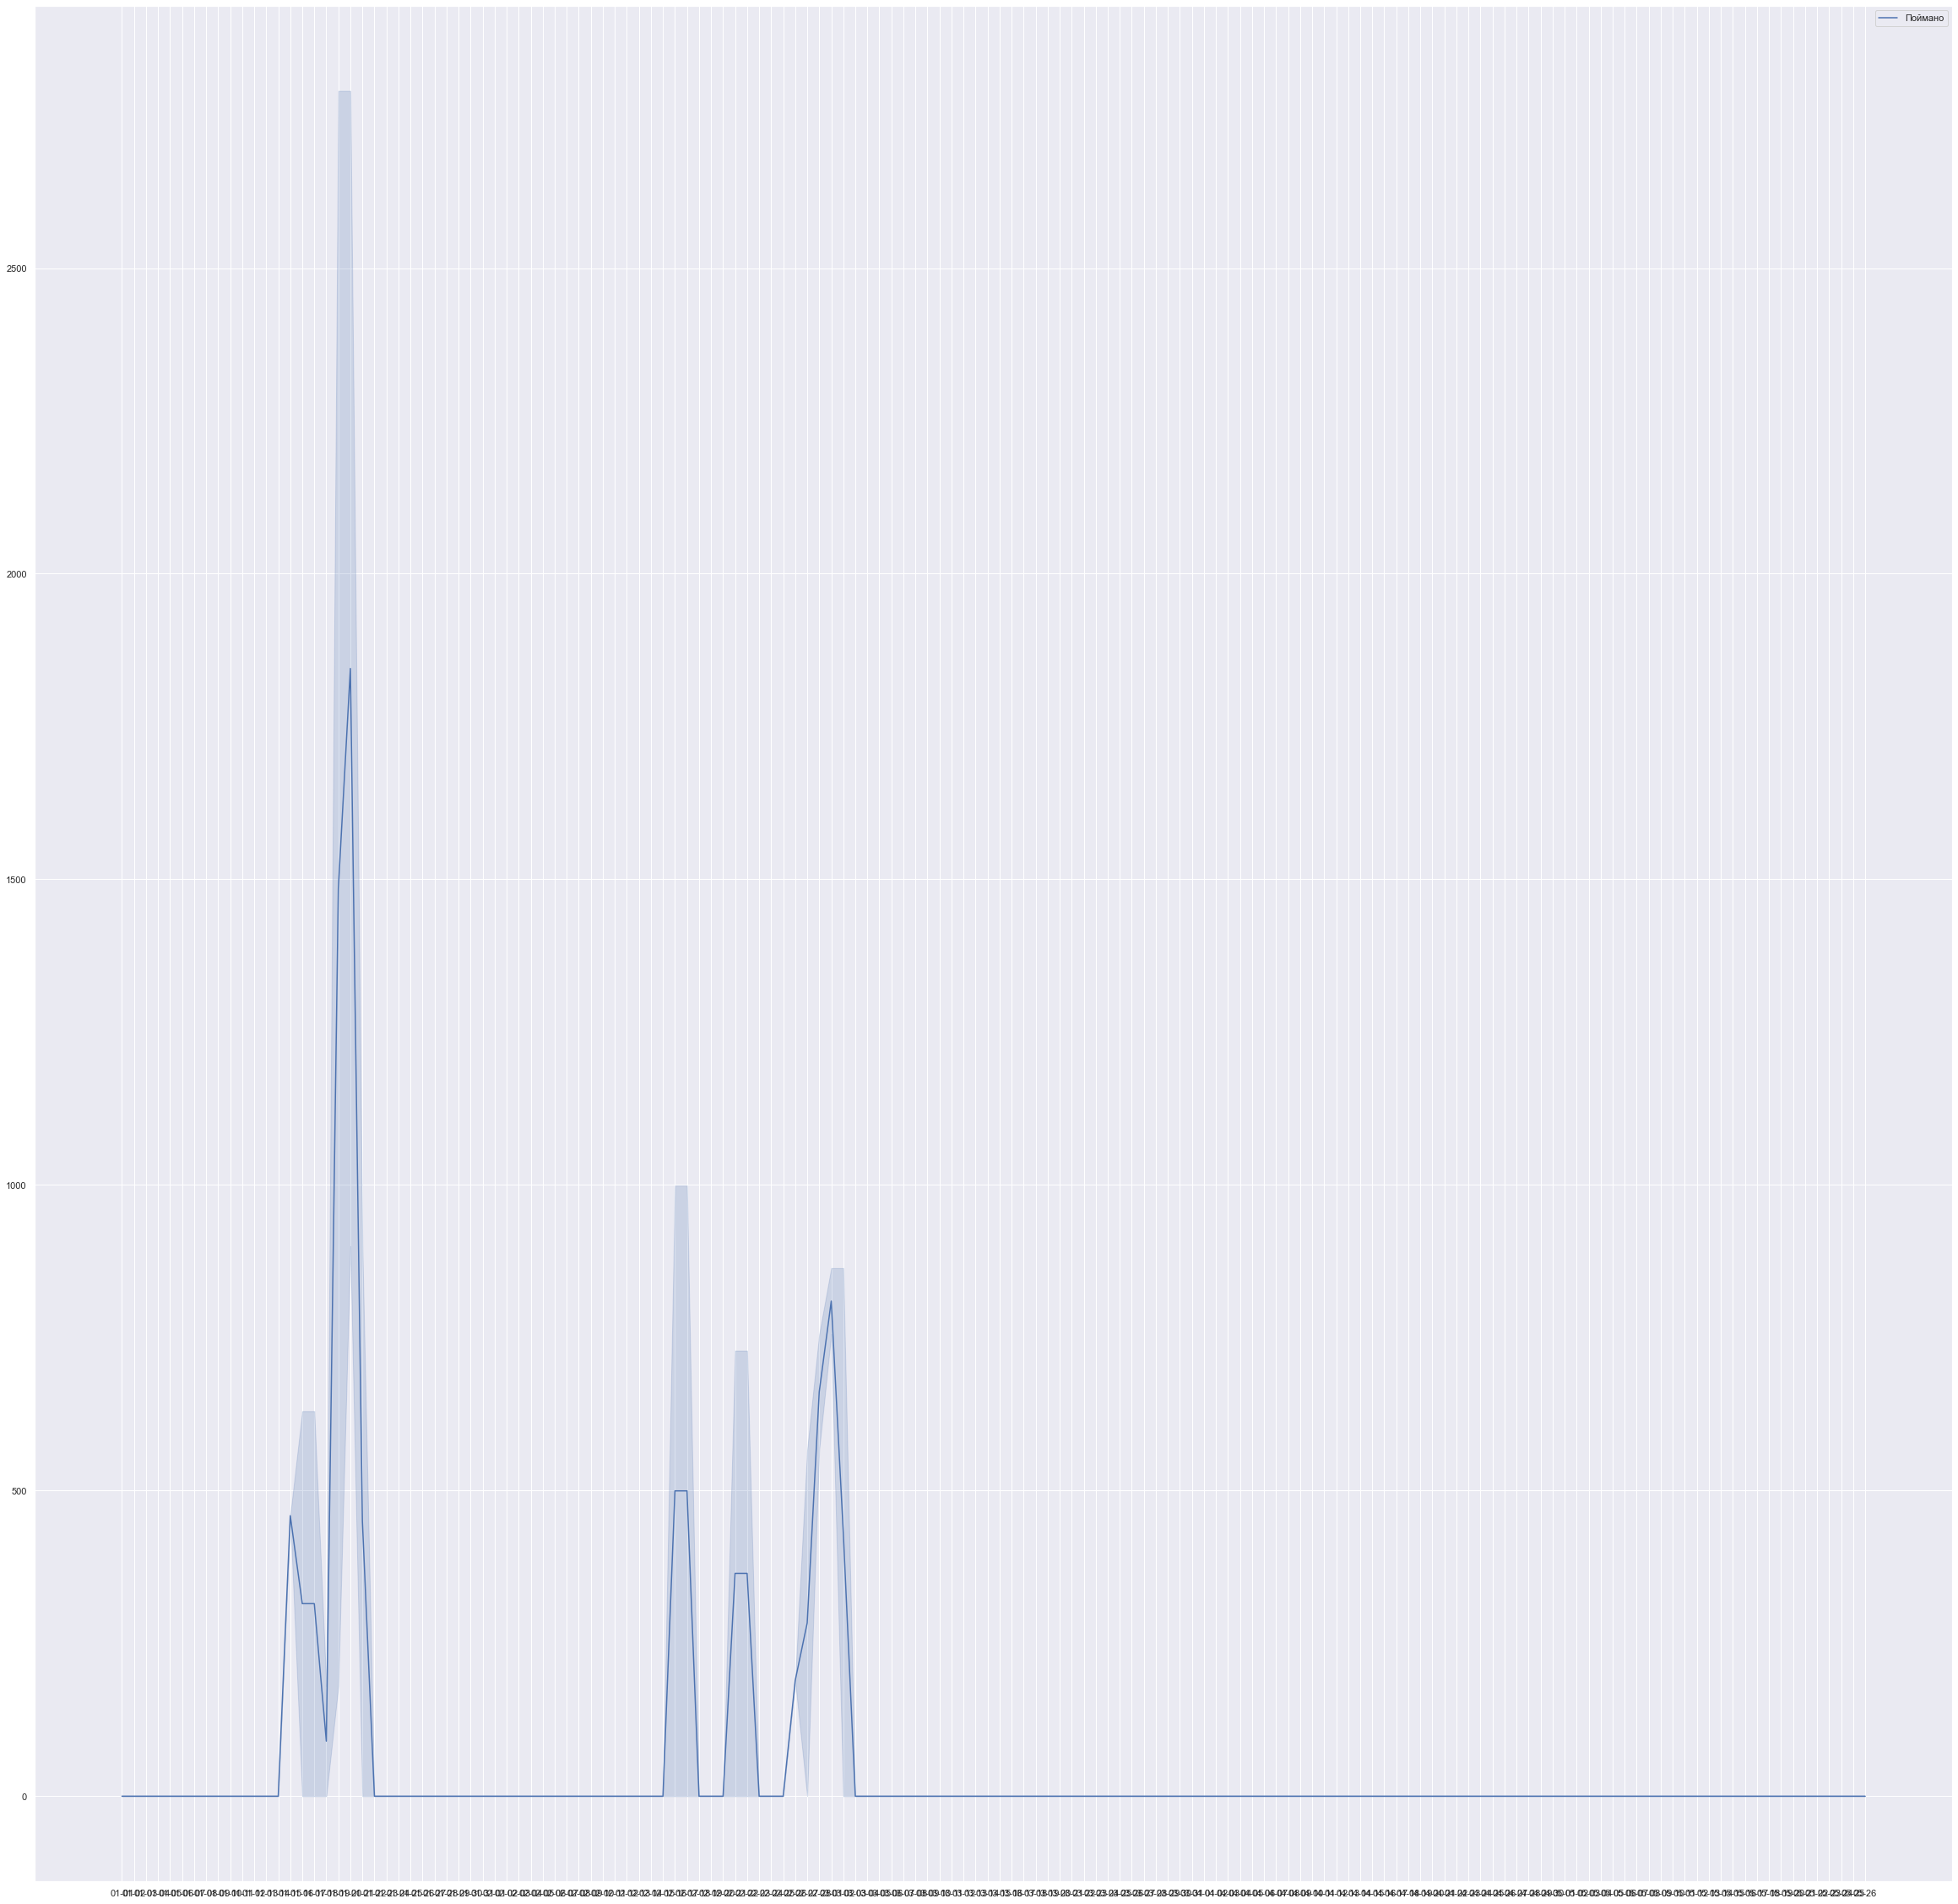

In [55]:
from IPython.display import display
from ipywidgets import Dropdown

fish__ = fish_df['fish'].tolist()
ids__ = fish_df['id_fish'].tolist()

options = []

for index in range(len(ids__)):
    options.append((fish__[index], ids__[index]))
    
dropdown = Dropdown(
    options=options,
    value=0, # Выбор по умолчанию
    description='Рыба: ' 
)

def draw_fish_id_market_anomalies(id_):
    if id_ == -1:
        pass
    else:
        id = id_.new
        dates = catch_df['date'].unique()
        Y = dates.copy()
        Total_X1 = []
        Total_X2 = []

        fish =  fish_df[fish_df['id_fish'] == id]['fish'].values[0]
        X1 = catch_df[catch_df['fish'] == fish]
        X2 = ext2[ext2['fish'] == fish]

        for date in dates:
            X1_dated = X1[X1['date'] == date]['catch.volume'].sum()
            X2_dated = X2[X2['date_vsd'] == date]['volume'].sum()

            Total_X1.append(X1_dated)
            Total_X2.append(X2_dated)
        
        if all([x == 0 for x in Total_X2]) or all([y == 0 for y in Total_X1]):
            print('Значений по данной рыбе нет в базе.')
        else:
            hue = []
            total_x = []
            total_x.extend(Total_X1)
            total_x.extend(Total_X2)
            for x in total_x:
                if x in Total_X1:
                    hue.append('Поймано')
                elif x in Total_X2:
                    hue.append('Передано')
            new_dates = []
            new_dates.extend(dates)
            new_dates.extend(dates)
            new_dates = [x[5:] for x in new_dates]

            sns.lineplot(y=total_x, x=new_dates, hue=hue)
            sns.set(rc={'figure.figsize':(40.7, 40.87)})

            total_anomalies = []
            total_dates = []

            delta_fishery = 0
            for index in range(len(Total_X1)):
                if Total_X1[index] > Total_X2[index]:
                    delta_fishery += Total_X2[index] - Total_X1[index]
                if Total_X1[index] < Total_X2[index]:
                    delta = Total_X2[index] - Total_X1[index]
                    if delta > delta_fishery:
                        total_anomalies.append(int(delta - delta_fishery) / 1000)
                        total_dates.append(dates[index])
                        delta_fishery = 0

            if len(total_anomalies) > 0: 
                print('Аномалии следующего объема и по дням:')
                for index in range(len(total_anomalies)):
                    print(f'{total_anomalies[index] } т., в течении {total_dates[index]} дня')

dropdown.observe(draw_fish_id_market_anomalies, names='value')
display(dropdown)

In [63]:
# Вспомогательная функция вычисления для КОНКРЕТНЫХ ВЛАДЕЛЬЦЕВ ГРУПП СУДОВ, по FishID
def calculatingSummOfFishTransfering(fish_name, start, end):
    print('Processing transfering')
    total_owners = []
    total_transfers = []
    total_fishery_date = []
    total_vsd_date = []
    
    # Смотрю по каждому ID акты передачи    
    vsd_fish_id = ext2[ext2['fish'] == fish_name]['id_vsd']
    # Для каждого акта определяю владельца     
    for vsd in vsd_fish_id:
        owners = ext1[ext1['id_vsd'] == vsd]['id_own'].unique().tolist()
        # Проверяю является ли владелец связанным по двум базам  
        for owner in owners:
            if owner in market_owners:
                data = ext2[ext2['id_vsd'] == vsd]
                try:
                    total_owners.append(owner)
                    total_transfers.append(data['volume'].values[0])
                    total_fishery_date.append(data['date_vsd'].values[0][5:10])
                    total_vsd_date.append(ext1[ext1['id_vsd'] == vsd]['date_fishery'].values[0][5:10])
                except Exception() as e:
                    print(e)
                    
    df = pd.DataFrame()
    
    df['owner'] = total_owners
    df['volume'] = total_transfers
    df['fishery_date'] = total_fishery_date
    df['vsd_date'] = total_vsd_date
    
    return df

# Сводная таблица по всем поступлениям согласно IdFish и выбранного промежутка времени.
def calculatingSummOfFish(fish_name, date_start, date_end):
    print('Processing incoming values')
    # смотрим по всем выловам этой рыбы
    data = catch_df[catch_df['fish'] == fish_name]
    # уникальные номера кораблей ловящих только эту рыбу
    ships = list(set(data['id.ves'].to_list()))
    
    # создаю датафрейм с владельцами и выловом по судам    
    total_df = pd.DataFrame()
    
    total_ships = []
    total_owners = []
    total_catches = []
    
    # добавляем в общую кашу дату и документируем владельцев
    for ship in ships:
        ship_data = data[data['id.ves'] == ship]
        owners = list(set(ship_data['id.own'].to_list()))
        
        for owner in owners:
            ship_owner_data = ship_data[ship_data['id.own'] == owner]
            
            try:
                ship_owner_end_data = ship_owner_data[ship_owner_data['date'] < date_end]
                ship_owner_start_end_data = ship_owner_end_data[ship_owner_end_data['date'] > date_start]
                total_catch = ship_owner_start_end_data['catch.volume'].sum()
            except e:
                print(e)
            
            if total_catch > 0:
                total_catches.append(total_catch)
                total_ships.append(ship)
                total_owners.append(owner)
            
    total_df['total_catches'] = total_catches
    total_df['ship'] = total_ships
    total_df['owner'] = total_owners
    
    return total_df

catcher_owners = catch_df['id.own'].unique()
traider_owners = ext1['id_own'].unique()

market_owners = []
for owner in traider_owners:
    if owner in catcher_owners:
        market_owners.append(owner)  
        
default_data = (catch_df['date'][0], catch_df['date'][len(catch_df) - 1])
start, end = default_data
    
# Смотрим по общему поступлению владельца и общей передачи
def getAllTransfers(id, start, end):
    incoming = calculatingSummOfFish(id, start, end)
    outcoming = calculatingSummOfFishTransfering(id, start, end)
    # Важно учитывать неналичие в таблице вылова владельцев которые не передают ничего.
    inputs = incoming['owner'].unique().tolist()
    outputs = outcoming['owner'].unique().tolist()
    owners = []
    for item in inputs:
        if item in outputs:
            owners.append(item)

    total_catches = []
    total_transfered = []
    total_owners = []
    total_fish = []
    for owner in owners:
        catch = incoming[incoming['owner'] == owner]['total_catches'].sum()
        transfer = outcoming[outcoming['owner'] == owner]['volume'].sum()
        if catch > 0 or transfer > 0:
            print(len(inputs), len(outputs), len(owners))
            print(catch, transfer, owner)
            total_catches.append(catch)
            total_transfered.append(transfer)
            total_owners.append(owner)
            total_fish.append(id)
    df = pd.DataFrame()
    df['catches'] = total_catches
    df['transfered'] = total_transfered
    df['owner'] = total_owners
    df['fish'] = total_fish
    return df

# Отсюда получаем блок данных в которых достоверно известно о всей получаемой рыбе от владельцев, 
# и о всех их передачах, если они записаны в БД

fishes_id = fish_df['fish'].to_list()[1:]
total_df = getAllTransfers(fishes_id[0], start, end)
for fish in fishes_id[1:]:
    df = getAllTransfers(fish, start, end)
    total_df = total_df.append(df, ignore_index=True)
    total_df

Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
8 1 1
1528086.0 1024891 953
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
1 1 1
9063.0 9063 1227
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering

Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
3 1 1
38328.0 63402 1227
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
193 81 81
467509.0 182268 1037
193 81 81
4414020.0 4825045 1060
193 81 81
2802959.0 527219 1028
193 81 81
4486967.0 7853937 1144
193 81 81
269505.0 71568 937
193 81 81
1493270.0 2154571 979
193 81 81
21978.0 19424 1195
193 81 81
4631866.331 6819890 1111
193 81 81
7820555.153999999 14098202 1047
193 81 81
3511235.0 3061726 1091
193 81 81
5299211.0 8271694 1156
193 81 81
2132086.0 4168639 1217
193 81 81
143892.0 16534 1095
193 81 81
4511678.0 7462328 1114
193 81 81
349200.0 8342004 1219
193 81 81
2644604.0 5239779 964
193 81 81
2445183.0 3072420 1210
193 81 81
544053.0 5

70 45 45
677.0 677 1049
70 45 45
460691.0 460688 1133
70 45 45
98377.0 98377 1085
70 45 45
780976.0 770098 1269
70 45 45
195562.0 8057 1241
70 45 45
49204.0 49271 1015
70 45 45
229.0 229 949
70 45 45
48095.0 44218 1103
70 45 45
117622.0 115480 1163
70 45 45
243823.812 244135 1152
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
4 3 3
9207.0 9207 1227
4 3 3
42913.0 42859 1156
4 3 3
20016.0 20016 964
Processing incoming values
Processing transfering
2 2 2
4122.0 4122 1156
2 2 2
6660.0 6660 964
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
2 1 1
486.0 486 1156
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Proc

Processing incoming values
Processing transfering
13 6 6
311313.0 313402 1203
13 6 6
456686.0 459659 941
13 6 6
428845.0 433335 1073
13 6 6
115099.0 115099 961
13 6 6
111210.0 103600 937
13 6 6
115076.0 115076 1207
Processing incoming values
Processing transfering
17 7 7
767633.6000000001 774937 1226
17 7 7
346773.4 454258 1229
17 7 7
1037812.0 1715007 992
17 7 7
402833.0 681056 1202
17 7 7
323087.0 649258 1251
17 7 7
1139354.0 1880611 978
17 7 7
519112.0 1008070 967
Processing incoming values
Processing transfering
3 1 1
100.0 164 1282
Processing incoming values
Processing transfering
5 4 4
170790.0 170428 1251
5 4 4
73053.0 117379 1011
5 4 4
96269.0 140696 978
5 4 4
87611.0 130550 1229
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
2 1 1
1414.0 1414 1202
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Pro

87 56 56
2154.0 2154 1188
87 56 56
6618.0 6618 1258
87 56 56
12931.0 12675 1023
87 56 56
101005.0 25597 979
87 56 56
31789.0 29618 981
87 56 56
15576.0 15576 1265
87 56 56
2354.0 2354 1010
87 56 56
48521.0 48674 1233
87 56 56
25939.0 26627 1072
87 56 56
218.0 175 914
87 56 56
7551.0 7551 1071
87 56 56
11534.0 11248 995
87 56 56
14663.0 16043 1055
87 56 56
69540.90000000001 70172 1153
87 56 56
117.14999999999999 116 977
87 56 56
4843.0 4426 1133
87 56 56
24887.0 25868 1085
87 56 56
44477.0 20873 1103
87 56 56
21581.0 23569 1015
87 56 56
21689.0 21033 949
87 56 56
45496.0 31355 1241
87 56 56
14954.0 15453 1046
87 56 56
3782.0 3584 1163
87 56 56
22440.523000000005 23788 1152
Processing incoming values
Processing transfering
12 11 8
333.0 333 1233
12 11 8
5513.0 6143 1187
12 11 8
3686.0 2828 1074
12 11 8
2952.0 2952 1188
12 11 8
1914.0 1914 1258
12 11 8
12126.0 12126 959
12 11 8
10343.0 10343 1002
12 11 8
1712.0 1679 1163
Processing incoming values
Processing transfering
70 43 43
22320.0 2

Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
6 1 1
1584.0 2316 953
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
P

Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering


Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering
Processing incoming values
Processing transfering


In [64]:
total_df

,catches,transfered,owner,fish
0,1528086.0,1024891.0,953.0,шпрот (килька)
1,9063.0,9063.0,1227.0,тунцы
2,1203.0,1203.0,1002.0,аргентина
3,2601607.0,338288.0,898.0,окунь-клювач
4,111518.0,202055.0,1144.0,окунь-клювач
...,...,...,...,...
877,9014340.0,7921409.0,960.0,путассу (северная)
878,285003.0,285003.0,1002.0,путассу (северная)
879,2376.0,13127.0,1274.0,хек (мерлуза)
880,45570.0,44730.0,1227.0,хек (мерлуза)


In [65]:
total_df['delta'] = total_df['transfered'] - total_df['catches']

fishes_ = total_df['fish'].tolist()
owners_ = total_df['owner'].tolist()
delta_ = total_df['delta'].tolist()
catches_ = total_df['catches'].tolist()

for index in range(len(owners_)):
    if delta_[index] <= 0 or delta_[index] < catches_[index] * 12 / 100:
        pass
    else:
        print(f'Владелец (ID - {str(int(owners_[index]))}) превысил норму вылова БВР {fishes_[index]} на {delta_[index]} т.')

Владелец (ID - 1144) превысил норму вылова БВР окунь-клювач на 90537.0 т.
Владелец (ID - 1210) превысил норму вылова БВР окунь-клювач на 24969.0 т.
Владелец (ID - 1213) превысил норму вылова БВР окунь-клювач на 3120.0 т.
Владелец (ID - 1274) превысил норму вылова БВР окунь-клювач на 115772.83999999997 т.
Владелец (ID - 928) превысил норму вылова БВР окунь-клювач на 1218.0 т.
Владелец (ID - 997) превысил норму вылова БВР окунь-клювач на 6726.0 т.
Владелец (ID - 1187) превысил норму вылова БВР окунь-клювач на 194718.0 т.
Владелец (ID - 1041) превысил норму вылова БВР окунь-клювач на 31517.297000000006 т.
Владелец (ID - 917) превысил норму вылова БВР окунь-клювач на 16911.0 т.
Владелец (ID - 1096) превысил норму вылова БВР окунь-клювач на 416609.0 т.
Владелец (ID - 1271) превысил норму вылова БВР окунь-клювач на 41262.0 т.
Владелец (ID - 1177) превысил норму вылова БВР окунь-клювач на 79393.30900000001 т.
Владелец (ID - 1047) превысил норму вылова БВР окунь-клювач на 73353.14000000001 т.


Dropdown(description='Рыба:', options=('шпрот (килька)', 'тунцы', 'аргентина', 'окунь-клювач', 'зубан', 'палту…

Владелец группы судов (ID - 1091) - передал больше, чем выловил за весь период.
Превышение составило - 33344660.0 т.
Владелец группы судов (ID - 973) - передал больше, чем выловил за весь период.
Превышение составило - 6749245.0 т.
Владелец группы судов (ID - 951) - передал больше, чем выловил за весь период.
Превышение составило - 38989596.0 т.
Владелец группы судов (ID - 1081) - передал больше, чем выловил за весь период.
Превышение составило - 8022401.0 т.
Владелец группы судов (ID - 925) - передал больше, чем выловил за весь период.
Превышение составило - 33551652.0 т.
Владелец группы судов (ID - 905) - передал больше, чем выловил за весь период.
Превышение составило - 27294713.393999994 т.
Владелец группы судов (ID - 1266) - передал больше, чем выловил за весь период.
Превышение составило - 7626437.2 т.
Владелец группы судов (ID - 989) - передал больше, чем выловил за весь период.
Превышение составило - 106643835.0 т.
Владелец группы судов (ID - 1196) - передал больше, чем выловил

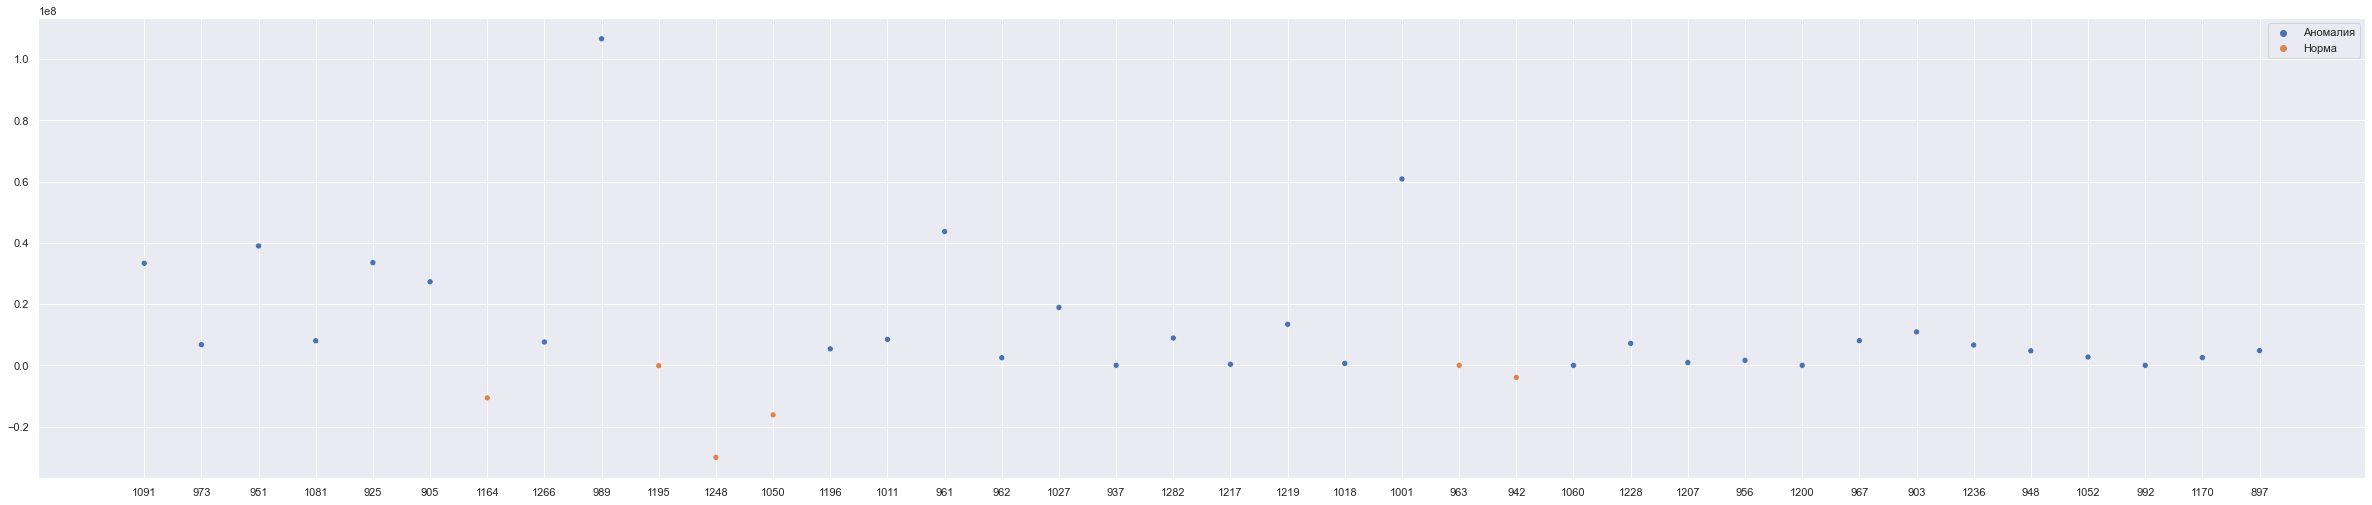

In [67]:
from IPython.display import display
from ipywidgets import Dropdown

fishes_list = total_df['fish'].unique().tolist()

drop1 = Dropdown(
    options = fishes_list,
    description = 'Рыба:'
)

def on_button_click(fish):
    target = fish.new
    total_df['delta'] = total_df['transfered'] - total_df['catches']

    current_owners = total_df[total_df['fish'] == target]['owner'].tolist()
    current_delta = total_df[total_df['fish'] == target]['delta'].tolist()
    current_catches = total_df[total_df['fish'] == target]['catches'].tolist()
    hue_ = []

    for index in range(len(current_delta)):
        if current_delta[index] <= 0: 
            hue_.append('Норма')
        # Допустимое отклонение от нормы согласно нормальному закону распределения         
        elif current_delta[index] < current_catches[index] * 12 / 100:
            hue_.append('Норма')
        else:
            hue_.append('Аномалия')

    current_owners = [str(int(x)) for x in current_owners]
    sns.scatterplot(x=current_owners, y=current_delta, hue=hue_)
    sns.set(rc={'figure.figsize':(41.7,8.47)})

    for index in range(len(current_owners)):
        if hue_[index] == 'Аномалия':
            print(f'Владелец группы судов (ID - {current_owners[index]}) - передал больше, чем выловил за весь период.\nПревышение составило - {current_delta[index]} т.')

drop1.observe(on_button_click, names='value')
display(drop1)